# Convolutional Neural Networks and Computer Vision with TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get the data

In [ ]:
#food101 dataset
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-21 18:38:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.0MB/s    in 6.2s    

2023-12-21 18:38:40 (16.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames ,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")


There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## Visualize images with class names

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")

class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import matplotlib.image as mpimg
import random

def view_random_image (target_dir, target_class):
    # Setup target directory (we'll view images from here)
  target_folder=target_dir+target_class

  # Get a random image path
  random_image=random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}")
  return img

['3484590.jpg']
image shape: (512, 512, 3)


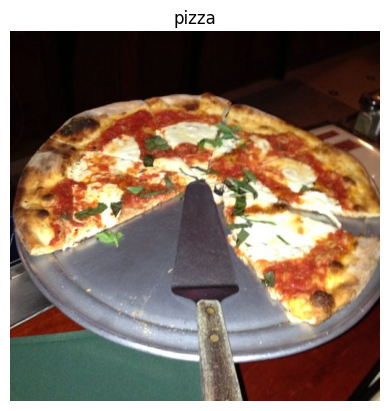

In [ ]:
# View a random image from the training dataset
img= view_random_image("pizza_steak/train/", "pizza")


# an end to end example

* load images
* preprocess images (scale)
* build a CNN
* Compile model
* Fit model
* Evaluate model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#Import darta from directories and turn it into batches

train_data=train_datagen.flow_from_directory(train_dir, batch_size=32,
                                            target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir, batch_size=32,
                                            target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# # Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)

model_1=tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=10,
                                   kernel_size=3,
                                   activation="relu",
                                   input_shape=(224, 224, 3)))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2 ,padding='valid'))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model_1.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')

# Fit the model
history_1=model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 175ms/step - loss: 0.5427 - accuracy: 0.7020 - val_loss: 0.4058 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4369 - accuracy: 0.8013 - val_loss: 0.3707 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 7s 154ms/step - loss: 0.4131 - accuracy: 0.8147 - val_loss: 0.3524 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3644 - accuracy: 0.8493 - val_loss: 0.3232 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 8s 166ms/step - loss: 0.3386 - accuracy: 0.8613 - val_loss: 0.3561 - val_accuracy: 0.8460


In [ ]:
# trying a binary classification model
tf.random.set_seed(42)
model_2=tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model_2.compile(loss="binary_crossentropy", optimizer='adam', metrics="accuracy")

# Fit the model
model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 120ms/step - loss: 0.7422 - accuracy: 0.5133 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# improving the model (more layers)
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3=tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model_3.compile(loss="binary_crossentropy", optimizer='adam', metrics="accuracy")

# Fit the model
model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 121ms/step - loss: 2.5256 - accuracy: 0.6253 - val_loss: 0.4761 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 1.0423 - accuracy: 0.6813 - val_loss: 0.8170 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.6883 - accuracy: 0.7180 - val_loss: 0.9245 - val_accuracy: 0.6640
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6013 - accuracy: 0.7440 - val_loss: 0.6678 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.5990 - accuracy: 0.7413 - val_loss: 1.1074 - val_accuracy: 0.6200


## 1. Visualize data

['401144.jpg']
image shape: (512, 306, 3)
['2967846.jpg']
image shape: (512, 512, 3)


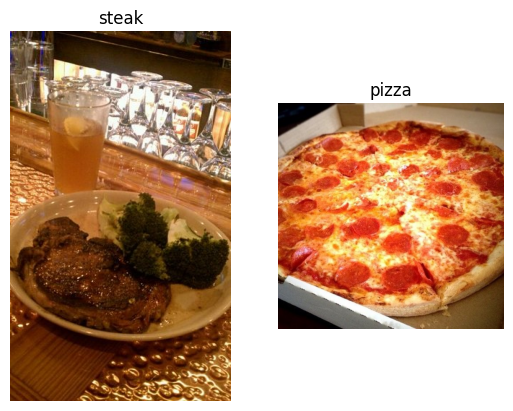

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("/content/pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("/content/pizza_steak/train/", "pizza")


#2 PREPROCESS DATA

In [ ]:
# Define training and test directory paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess data

# Create train and test data generators and rescale the data
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Import darta from directories and turn it into batches

train_data=train_datagen.flow_from_directory(train_dir, batch_size=32,
                                            target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir, batch_size=32,
                                            target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Create a CNN Model

start with a baseline (simple model)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be the baseline, a 3 layer Convolutional Neural Network)
CNNModel=Sequential()
CNNModel.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",
                    activation="relu", input_shape=(224, 224, 3))) # input layer (specify input shape)
CNNModel.add(Conv2D(10, 3, activation="relu" ))
CNNModel.add(Conv2D(10, 3, activation="relu"))
CNNModel.add(Flatten())
CNNModel.add(Dense(1, activation="sigmoid")) # output layer (specify output shape)


In [ ]:
CNNModel.compile(loss="binary_crossentropy", optimizer=Adam(), metrics="accuracy") # Compile the model

In [ ]:
History_4=CNNModel.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data) ) # Fit the model

Epoch 1/10
47/47 [==============================] - 8s 138ms/step - loss: 0.9848 - accuracy: 0.6607 - val_loss: 0.4177 - val_accuracy: 0.8100
Epoch 2/10
47/47 [==============================] - 6s 132ms/step - loss: 0.4153 - accuracy: 0.8160 - val_loss: 0.3741 - val_accuracy: 0.8380
Epoch 3/10
47/47 [==============================] - 7s 149ms/step - loss: 0.2518 - accuracy: 0.9107 - val_loss: 0.3886 - val_accuracy: 0.8140
Epoch 4/10
47/47 [==============================] - 7s 152ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.4982 - val_accuracy: 0.7900
Epoch 5/10
47/47 [==============================] - 6s 123ms/step - loss: 0.0221 - accuracy: 0.9987 - val_loss: 0.5875 - val_accuracy: 0.7840
Epoch 6/10
47/47 [==============================] - 7s 142ms/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 1.0927 - val_accuracy: 0.7460
Epoch 7/10
47/47 [==============================] - 6s 132ms/step - loss: 0.0082 - accuracy: 0.9987 - val_loss: 0.9221 - val_accuracy: 0.7640
Epoch 

In [ ]:
model_1.evaluate(valid_data) #evaluate the model

16/16 [==============================] - 2s 90ms/step - loss: 0.3561 - accuracy: 0.8460


[0.3560557961463928, 0.8460000157356262]

In [ ]:
CNNModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

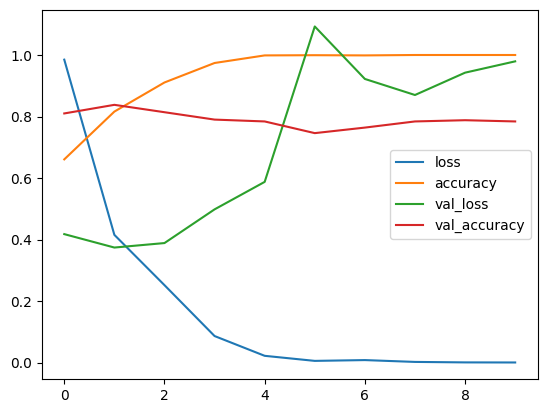

In [ ]:
pd.DataFrame(History_4.history).plot() # Plot the training curves

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  '''
  Returns seperate loss curves for training and validation
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


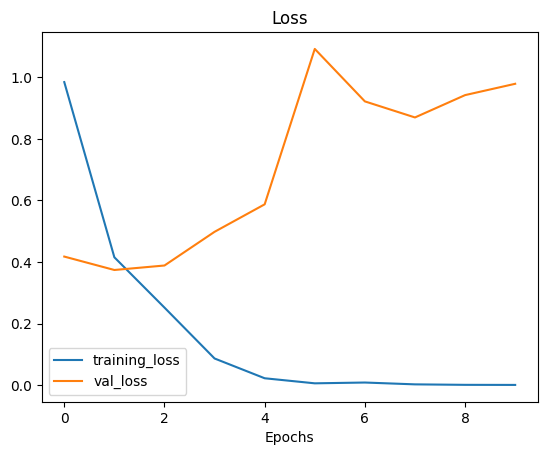

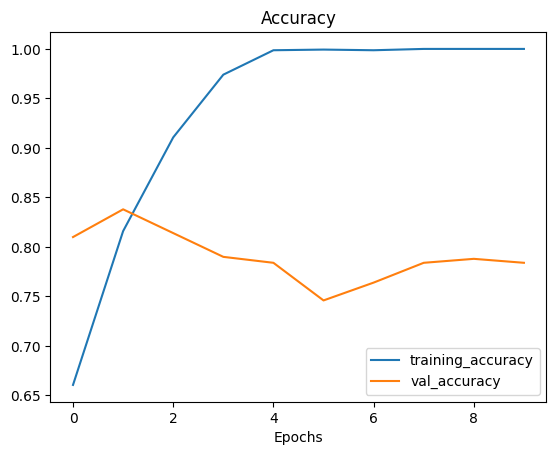

In [ ]:
plot_loss_curves(History_4) # Check out the loss curves of model 4

In [ ]:
#add maxpool2D layers to baseline
model5=Sequential()
model5.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)))
model5.add(MaxPool2D(pool_size=2)) # reduce number of features by half
model5.add(Conv2D(10, 3, activation="relu"))
model5.add(MaxPool2D(pool_size=2))
model5.add(Conv2D(10, 3, activation="relu"))
model5.add(MaxPool2D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(1, activation="sigmoid"))


In [ ]:
model5.compile(loss="binary_crossentropy",optimizer=Adam(), metrics="accuracy") # Compile model (same as previous)

In [ ]:
history5=model5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data)) # Fit the model

Epoch 1/5
47/47 [==============================] - 9s 151ms/step - loss: 0.5957 - accuracy: 0.6947 - val_loss: 0.5485 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.5081 - accuracy: 0.7540 - val_loss: 0.4197 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4411 - accuracy: 0.8040 - val_loss: 0.3868 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4254 - accuracy: 0.8207 - val_loss: 0.3651 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3931 - accuracy: 0.8260 - val_loss: 0.3315 - val_accuracy: 0.8480


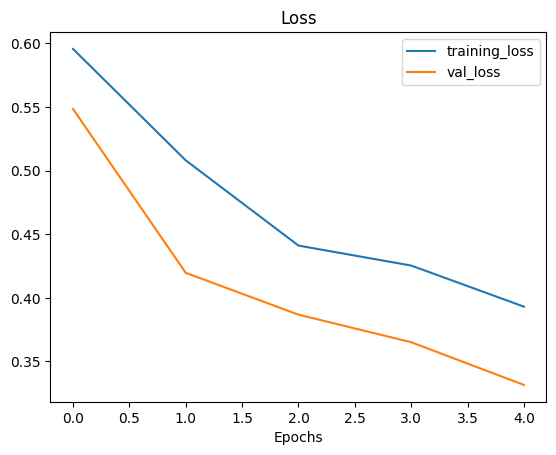

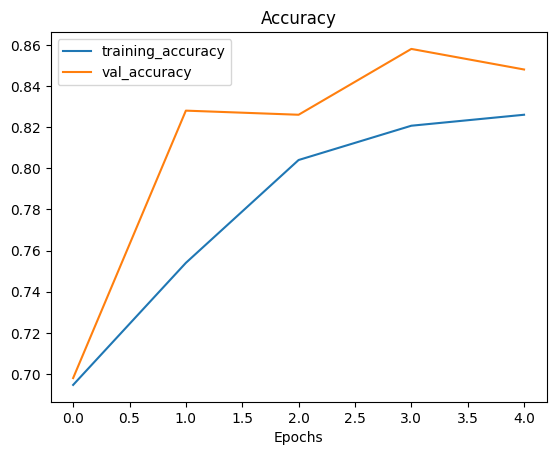

In [ ]:
plot_loss_curves(history5) # Plot loss curves of model5 results

## Data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2,
                                           zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)


In [ ]:
print("augmented training data")

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32,  class_mode="binary", shuffle=False)

augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels=train_data.next()
aug_images, aug_labels=train_data_augmented.next()

###Show original and augmented image

Showing image number: 30
Showing image number: 30


(-0.5, 223.5, 223.5, -0.5)

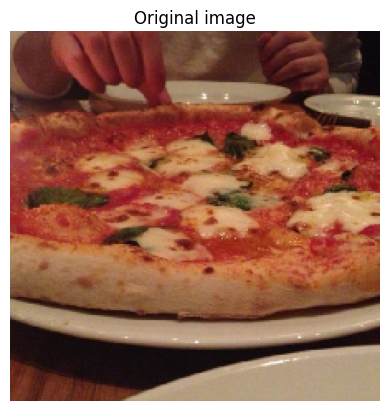

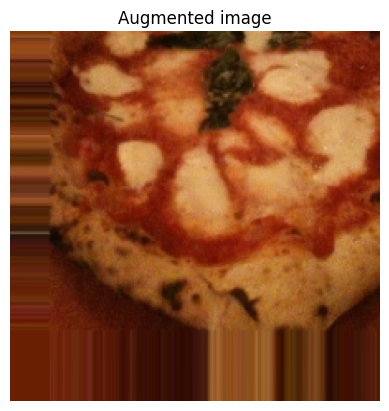

In [ ]:
random_number=random.randint(0,32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)

plt.figure()
print(f"Showing image number: {random_number}")
plt.imshow(aug_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


In [ ]:
# Create the model (same as model5)
model6=Sequential()
model6.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)))
model6.add(MaxPool2D(pool_size=2))
model6.add(Conv2D(10, 3, activation="relu"))
model6.add(MaxPool2D(pool_size=2))
model6.add(Conv2D(10, 3, activation="relu"))
model6.add(MaxPool2D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(1, activation="sigmoid"))

# Compile the model
model6.compile(loss="binary_crossentropy",optimizer=Adam(), metrics="accuracy")

# Fit the model
history6=model6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 25s 470ms/step - loss: 0.7604 - accuracy: 0.3893 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6931 - accuracy: 0.4993 - val_loss: 0.6872 - val_accuracy: 0.5240
Epoch 3/5
47/47 [==============================] - 25s 530ms/step - loss: 0.6907 - accuracy: 0.5087 - val_loss: 0.6836 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6934 - accuracy: 0.5147 - val_loss: 0.6746 - val_accuracy: 0.6200
Epoch 5/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6807 - accuracy: 0.6000 - val_loss: 0.6488 - val_accuracy: 0.6760


In [ ]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32,  class_mode="binary", shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model7=Sequential()
model7.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)))
model7.add(MaxPool2D(pool_size=2))
model7.add(Conv2D(10, 3, activation="relu"))
model7.add(MaxPool2D(pool_size=2))
model7.add(Conv2D(10, 3, activation="relu"))
model7.add(MaxPool2D(pool_size=2))
model7.add(Flatten())
model7.add(Dense(1, activation="sigmoid"))

model7.compile(loss="binary_crossentropy",optimizer=Adam(), metrics="accuracy")

history7=model7.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 25s 500ms/step - loss: 0.6653 - accuracy: 0.5927 - val_loss: 0.5591 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 24s 507ms/step - loss: 0.5392 - accuracy: 0.7433 - val_loss: 0.3602 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 25s 542ms/step - loss: 0.4786 - accuracy: 0.7780 - val_loss: 0.3727 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 24s 502ms/step - loss: 0.4623 - accuracy: 0.7933 - val_loss: 0.3189 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.4438 - accuracy: 0.8093 - val_loss: 0.3944 - val_accuracy: 0.8180


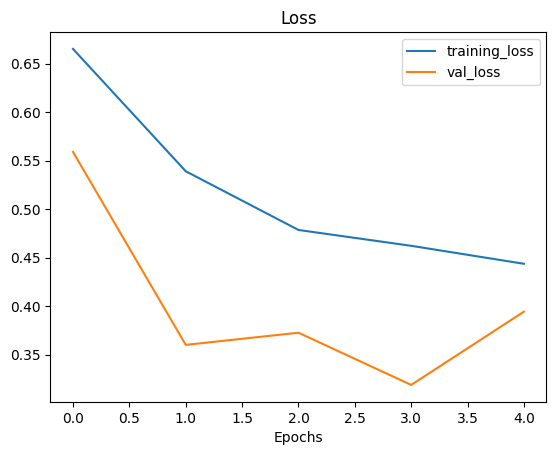

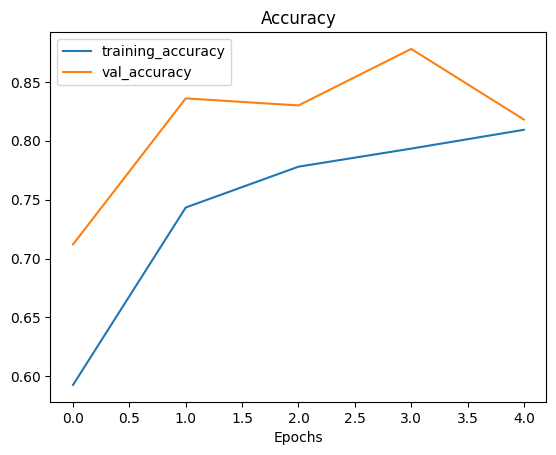

In [ ]:
plot_loss_curves(history7) # Check model's performance history training on augmented data

In [ ]:
#download image to test on
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")


--2023-12-21 18:47:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-12-21 18:47:53 (161 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



##Create a function for preprocessing images

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    # Read in target file (an image)
  img=tf.io.read_file(filename)
    # Decode the read file into a tensor & ensure 3 colour channels
  img=tf.image.decode_image(img)
    # Resize the image (to the same size our model was trained on)
  img=tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
  img=img/255.
  return img

In [ ]:
steak=load_and_prep_image("03-steak.jpeg", img_shape=224) # Load in and preprocess custom image

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred=model7.predict(tf.expand_dims(steak, axis=0)) # Make a prediction on custom image

1/1 [==============================] - 0s 362ms/step


In [ ]:
pred_class=class_names[[int(tf.round(pred))]]

In [ ]:
pred_class

array(['steak'], dtype='<U5')

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 31ms/step


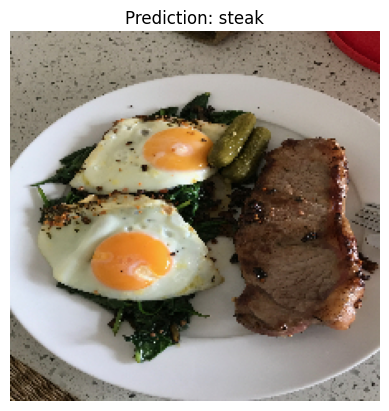

In [ ]:
pred_and_plot(model7, "03-steak.jpeg", class_names)

## **Multiclass classification**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# download and unzip dataset
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-21 18:56:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 142.250.4.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  18.7MB/s    in 28s     

2023-12-21 18:57:07 (17.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

#walkthrough directories
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories an {len(filenames)} images in {dirpath} ")

There are 2 directories an 0 images in 10_food_classes_all_data 
There are 10 directories an 0 images in 10_food_classes_all_data/train 
There are 0 directories an 750 images in 10_food_classes_all_data/train/chicken_wings 
There are 0 directories an 750 images in 10_food_classes_all_data/train/sushi 
There are 0 directories an 750 images in 10_food_classes_all_data/train/grilled_salmon 
There are 0 directories an 750 images in 10_food_classes_all_data/train/chicken_curry 
There are 0 directories an 750 images in 10_food_classes_all_data/train/hamburger 
There are 0 directories an 750 images in 10_food_classes_all_data/train/fried_rice 
There are 0 directories an 750 images in 10_food_classes_all_data/train/ice_cream 
There are 0 directories an 750 images in 10_food_classes_all_data/train/ramen 
There are 0 directories an 750 images in 10_food_classes_all_data/train/steak 
There are 0 directories an 750 images in 10_food_classes_all_data/train/pizza 
There are 10 directories an 0 image

In [ ]:
train_dir="/content/10_food_classes_all_data/train/"
test_dir="/content/10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1775853.jpg']
image shape: (384, 512, 3)


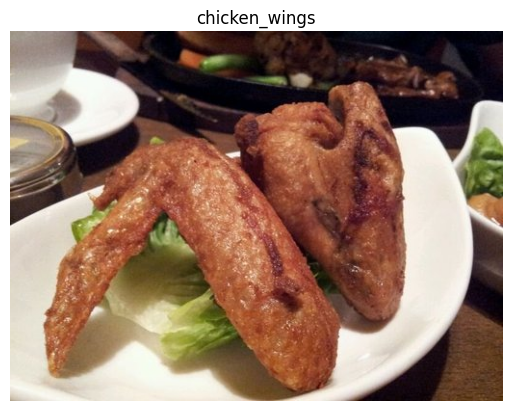

In [ ]:
# View a random image from the training dataset
import random
img=view_random_image(train_dir, random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess data

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Import darta from directories and turn it into batches

train_data=train_datagen.flow_from_directory(train_dir, batch_size=32,
                                            target_size=(224, 224),
                                             class_mode="categorical",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir, batch_size=32,
                                            target_size=(224, 224),
                                             class_mode="categorical",
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Create our model (a clone of model7, except to be multi-class)
model_8=Sequential()
model_8.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)))
model_8.add(Conv2D(10, 3, activation="relu"))
model_8.add(MaxPool2D(pool_size=2))
model_8.add(Conv2D(10, 3, activation="relu"))
model_8.add(Conv2D(10, 3, activation="relu"))
model_8.add(MaxPool2D(pool_size=2))
model_8.add(Flatten())
model_8.add(Dense(10, activation="softmax")) # now 10 different classes


In [ ]:
# Compile the model
model_8.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics="accuracy")  # changed to categorical_crossentropy

In [ ]:
# Fit the model
model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 35s 140ms/step - loss: 2.1343 - accuracy: 0.2188 - val_loss: 2.0026 - val_accuracy: 0.2864
Epoch 2/5
235/235 [==============================] - 33s 141ms/step - loss: 1.8778 - accuracy: 0.3529 - val_loss: 1.9861 - val_accuracy: 0.2980
Epoch 3/5
235/235 [==============================] - 32s 136ms/step - loss: 1.5866 - accuracy: 0.4633 - val_loss: 1.9507 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 31s 130ms/step - loss: 1.1112 - accuracy: 0.6281 - val_loss: 2.2867 - val_accuracy: 0.3204
Epoch 5/5
235/235 [==============================] - 33s 140ms/step - loss: 0.5847 - accuracy: 0.8081 - val_loss: 2.9607 - val_accuracy: 0.2956


In [ ]:
#adjust model parameters
# Try a simplified model (removed two layers)
model_9=Sequential()
model_9.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)))
model_9.add(MaxPool2D(pool_size=2))
model_9.add(Conv2D(10, 3, activation="relu"))
model_9.add(MaxPool2D(pool_size=2))
model_9.add(Flatten())
model_9.add(Dense(10, activation="softmax"))



In [ ]:
model_9.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics="accuracy")

In [ ]:
history_9=model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 31s 127ms/step - loss: 2.1538 - accuracy: 0.2279 - val_loss: 1.9699 - val_accuracy: 0.3108
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 1.7959 - accuracy: 0.3877 - val_loss: 1.9314 - val_accuracy: 0.3216
Epoch 3/5
235/235 [==============================] - 29s 122ms/step - loss: 1.4064 - accuracy: 0.5365 - val_loss: 2.0474 - val_accuracy: 0.3076
Epoch 4/5
235/235 [==============================] - 34s 145ms/step - loss: 0.9201 - accuracy: 0.7104 - val_loss: 2.3821 - val_accuracy: 0.3032
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.4969 - accuracy: 0.8597 - val_loss: 2.8797 - val_accuracy: 0.2940


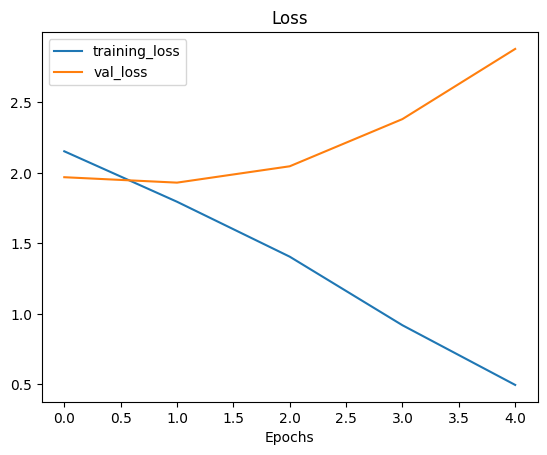

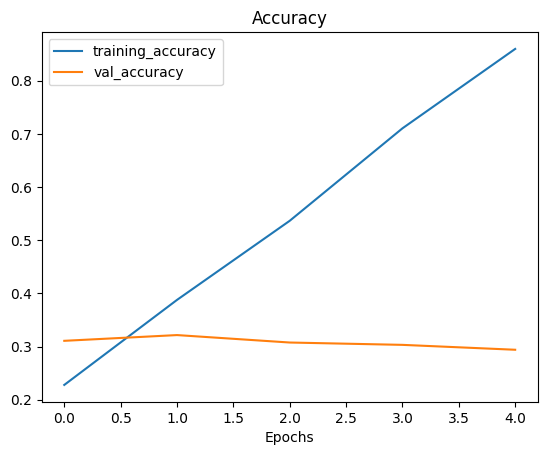

In [ ]:
plot_loss_curves(history_9) # Check out the loss curves of model_9

## use data augmentation with multiclass model

In [ ]:
# Create augmented data generator instance
train_datagen_augmented=ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2,
                                           zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32,  class_mode="categorical", shuffle=True)

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_10=tf.keras.models.clone_model(model_8)

In [ ]:
model_10.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics="accuracy") # Compile the cloned model (same setup as used for model_8)

In [ ]:
History_10=model_10.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=valid_data, validation_steps=len(valid_data)) # use augmented data when fitting

Epoch 1/5
235/235 [==============================] - 123s 515ms/step - loss: 2.2582 - accuracy: 0.1577 - val_loss: 2.0649 - val_accuracy: 0.2432
Epoch 2/5
235/235 [==============================] - 113s 480ms/step - loss: 2.1231 - accuracy: 0.2408 - val_loss: 2.0228 - val_accuracy: 0.2720
Epoch 3/5
235/235 [==============================] - 117s 496ms/step - loss: 2.0871 - accuracy: 0.2465 - val_loss: 1.9824 - val_accuracy: 0.2892
Epoch 4/5
235/235 [==============================] - 115s 489ms/step - loss: 2.0696 - accuracy: 0.2717 - val_loss: 1.9743 - val_accuracy: 0.3076
Epoch 5/5
235/235 [==============================] - 115s 491ms/step - loss: 2.0418 - accuracy: 0.2692 - val_loss: 1.9395 - val_accuracy: 0.3172


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-12-21 20:15:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-12-21 20:15:54 (129 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-12-21 20:15:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
sushi=load_and_prep_image("03-sushi.jpeg", img_shape=224)

In [ ]:
model_10.predict(tf.expand_dims(sushi, axis=0))

1/1 [==============================] - 0s 222ms/step


array([[0.24175766, 0.10876223, 0.07812252, 0.11543857, 0.11114891,
        0.01432481, 0.11907059, 0.10181557, 0.03306093, 0.07649814]],
      dtype=float32)

1/1 [==============================] - 0s 63ms/step


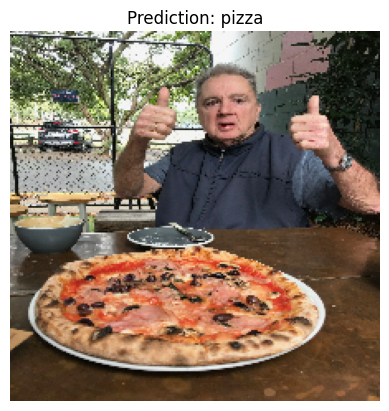

In [ ]:
pred_and_plot(model5, "03-pizza-dad.jpeg", class_names=["pizza", "steak"])

In [ ]:
model_10.save("saved_10")

In [ ]:
loaded_10=tf.keras.models.load_model("saved_10")
loaded_10.evaluate(valid_data)

79/79 [==============================] - 7s 86ms/step - loss: 1.9395 - accuracy: 0.3172


[1.939489483833313, 0.3172000050544739]

In [ ]:
model_10.evaluate(valid_data)

79/79 [==============================] - 8s 106ms/step - loss: 1.9395 - accuracy: 0.3172


[1.939489483833313, 0.3172000050544739]